# 분류

## 1. 지도학습
* **정답(=레이블)이 있는 데이터가 주어진 상태**에서 학습하는 머신러닝 방법
* 대표적인 지도학습으로 **분류(classification)**와 **회귀(regression)**가 있다.

## 2. 분류
학습 데이터가 어떤 **레이블(=클래스값, 결정값)에 속하는지**에 대한 패턴을 머신러닝 알고리즘으로 학습한 모델로 새로운 데이터의 레이블을 예측하는 기법이다. 분류는 다음과 같은 머신러닝 알고리즘으로 구현할 수 있다.

<img src='classification_algorithm.png' width=60%>

앙상블은 이미지, 영상, 음성, NLP 영역 외에 **정형 데이터의 예측 분석 영역**에서 애용되고 있는 방법이다.
* 보팅(Voting) : 같은 학습 데이터로 서로 다른(or 같은) 알고리즘으로 학습하여 최종 예측 결과를 선정하는 방식
* 배깅(Bagging) : 학습 데이터를 여러 개로 샘플링 하여 같은 알고리즘을 가지고 학습을 하는 방식
    * ex. 랜덤 포레스트(Random Forest)
* 부스팅(Boosting) : 여러 개의 알고리즘으로 순차적으로 학습하는데, 앞에서 틀리게 예측한 것에 가중치를 주어 예측률을 높이는 방식
    * ex. 그래디언트 부스팅(Gradient Boosting), XGBoost(eXtra Gradient Boosting), LightGBM
* 스태킹(Stacking) : 여러 개의 알고리즘의 예측 결과값을 학습 데이터로 만들어 다른 알고리즘으로 학습하는 방식

## 3. 결정 트리
데이터의 규칙을 학습하여 **트리(Tree) 기반의 분류 규칙**을 생성하는 것.
* `Decision Node(규칙 노드)` : 분류 규칙/기준 → 매 Decision Node마다 서브 트리가 생성
* `Leaf Node(리프 노드)` : 규칙에 의해 결정되는 Label 값(=클래스 값)
<img src='decision_tree.png' width=60%>

### 3.1. 균일도와 엔트로피

#### 3.1.1. Decision Node와 성능
Decision Node가 많아질수록(= 트리의 깊이가 깊어질수록) 분류를 결정하는 방식이 더 복잡해지므로 오버피팅이 발생하여 성능 저하가 일어날 가능성이 높다. 그래서 예측 정확도를 높이기 위해서 **가능한 적은 Decision Node로 최대한 균일한 데이터 세트로 분리되도록** 해야 한다. 

#### 3.1.2. 균일도
균일도가 높은 데이터 세트란 **한 가지 종류의 데이터가 데이터 세트의 상당 부분을 차지할 때의 데이터 세트**를 말한다. 이러한 균일도를 측정하는 지표로 엔트로피를 이용한 `정보이득지수`와 `지니계수`가 있다.

#### 3.1.3. 엔트로피: 정보이득과 지니계수
엔트로피란 **주어진 데이터 집합의 혼잡도**를 말한다. 서로 다른 값이 섞여있으면 엔트로피가 높고, 같은 값이 섞여있으면 엔트로피가 낮다.
* **정보 이득 지수** : `1 - 엔트로피`
    * 결정트리는 정보이득지수가 높은 속성을 기준으로 분할을 한다.
* **지니계수** : 데이터의 균일도
    * 다양한 값을 가질수록 0에 가까워지며(=평등), 특정 값에 쏠릴수록 1에 가까워진다(=불평등).
    * 결정 트리는 지니계수가 높은 속성을 기준으로 분할을 한다. 

### 3.2. 결정 트리 모델의 특징
모델 정확도를 높이다 보면 트리의 깊이는 계속 깊어지게 되고 테스트 시 예측 성능이 떨어질수 밖에 없다. 그러므로 완벽한 규칙은 만들 수 없다고 인정하고 좀 더 나은 성능을 위해 **트리의 크기를 사전에 제한을 하는 튜닝**이 필요하다. 

<img src='decision_tree_pros_cons.png' width=80%>

### 3.3. 결정 트리 파라미터
사이킷런에서는 결정 트리 알고리즘을 구현한 `DecisionTreeClassifier`와 `DecisionTreeRegressor` 클래스를 제공한다. 전자는 분류를 위한 클래스이며, 후자는 회귀를 위한 클래스이다.

#### 3.3.1. `min_samples_split`
노드를 분할하기 위한 최소한의 샘플 데이터 수
* 과적합 제어용으로 쓰이는 파라미터
* 디폴트 값은 2이며, 값이 작을수록 분할되는 노드수가 증가하여 과적합이 증가

#### 3.3.2. `min_samples_leaf`
리프 노드가 되기 위한 최소 샘플 데이터 수
* 과적합 제어용으로 쓰이는 파라미터이지만
* 특정 클래스의 데이터가 극도로 적을 경우 `min_samples_leaf`를 작게 설정해야 한다.

#### 3.3.3. `max_features`
최적의 분할을 위해 고려할 최대 피처의 개수
* `None` : 디폴트 값으로 데이터 세트의 모든 피처를 고려한다.
* `int형` : 고려할 피처의 개수
* `float형` : 고려할 피처의 비율
* `sqrt` : $\sqrt{전체 피처의 개수}$ 만큼 고려
* `auto` : `sqrt`와 동일한 개수만큼 피처를 고려
* `log` : $\log_{2}{전체피처개수}$ 만큼 고려

#### 3.3.4. `max_depth`
트리의 최대 깊이
* `None` : 완벽하게 클래스 값이 결정 or `min_samples_split`보다 데이터 개수가 작아질 때까지 깊이 증가
* 깊이가 깊어지면 `min_samples_split`의 값만큼 최대 분할이 되므로 오버피팅이 일어날 수 있다.

#### 3.3.5. `max_leaf_nodes`
리프 노드의 최대 개수

### 3.4. 결정 트리 모델의 시각화
`Graphviz` 패키지를 사용하면 결정 트리 알고리즘이 어떤 규칙을 가지고 트리를 생성하는지 시각적으로 볼 수 있다. 사이킷런에서 `export_graphviz()`에 인자로 `학습이 완료된 Estimator`, `피처의 column명`, `레이블 값`을 넣으면 트리 형태로 시각화해준다.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터 로딩 and 학습/테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier의 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

In [2]:
from sklearn.tree import export_graphviz

# 학습된 모델을 가지고 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, \
               feature_names=iris_data.feature_names, impurity=True, filled=True)

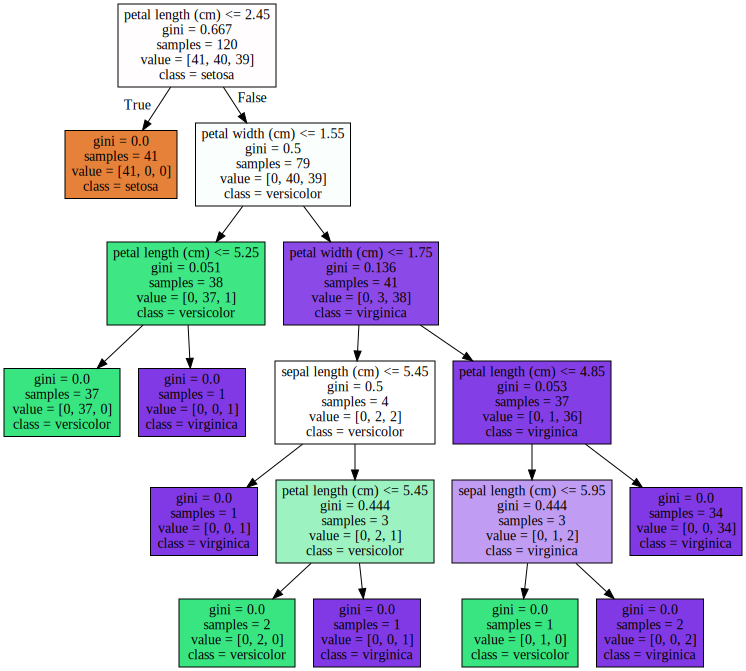

In [4]:
import graphviz

# 위에서 생성된 tree.dot 파일을 graphviz가 읽어서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)